# Tutorial 2 - Gd (magnetism)

In [1]:
# Ignore the following commands, they are required to use EntroPy without installing it as a package
import sys
sys.path.append('.')

___

## Getting started

We start by importing the EntroPy module:

In [2]:
import EntroPy

And a couple more of utlitiy modules:

In [3]:
import matplotlib.pyplot as plt # Usefull for plotting
import numpy as np  # VERY usefull for handling arrays

___

# Reading the data from the Monte Carlo simulations

To calculate the magnetic entropy associted with the response of a magnetic field (aka magnetocaloric effect) we need to run calculations with at least two magnetic field $B_i$ and $B_f$. In this example $B_i$=0 and $B_f$=2T.

In case we use UppASD for the MC simulations, we are interested in collecting the last entry in the cumulants.simid.out file for each temperature.
There is a script in the UppASD directory examples/scripts/printM.sh that serve of inspiration to do so. In this tutorial directory , inside of scripts folder you will find  Tsweep that is extended version suiting better our needs.

Let's start by reading the data grabbed by Tsweep:

In [4]:
B0=np.genfromtxt('Gd/B0')
B2=np.genfromtxt('Gd/B2')

Read this way, the data is organized the following way (have a look at the data file):

* B0 [:,0]_ corresponds to the column of Temperatures
* B0 [:,1]_ corresponds to the column of Magnetizations
* ...
* B0 [:,6]_ corresponds to the column of Cv
* B0 [:,7]_ corresponds to the column of Energies
* ...

Let's have a look:

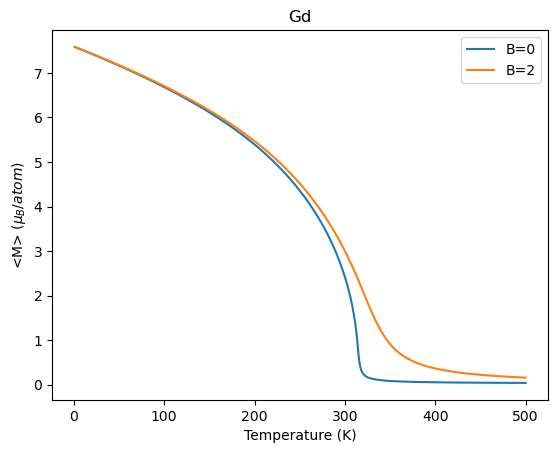

In [5]:
plt.plot(B0[:,0],B0[:,1],label='B=0')
plt.plot(B2[:,0],B2[:,1],label='B=2')
plt.legend()
plt.title('Gd')
plt.xlabel('Temperature (K)')
plt.ylabel('<M> ($\mu_B/atom$)')
plt.show()

We want to focus now on the Cv, **because it is great !** . From there we can:
* Get phase transitions/ changes on the ordering - Peaks in $C_v$ often indicate a change in the magnetic ordering;
* Calculate the magnetic entropy as:


$S_{mag}(T) = \int_0^T \frac{Cv}{T}dT$


So lets have a look at $C_v$:

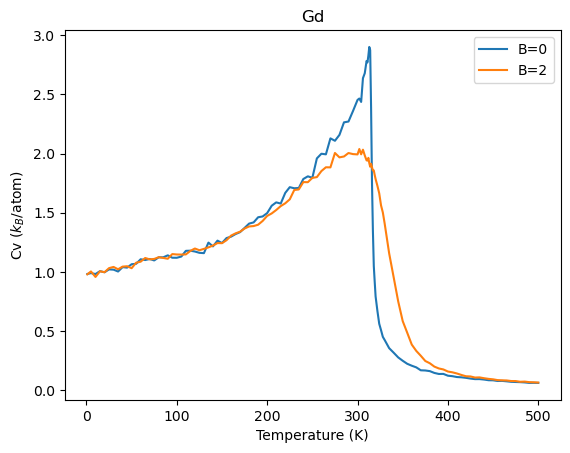

In [6]:
plt.plot(B0[:,0],B0[:,6],label='B=0')
plt.plot(B2[:,0],B2[:,6],label='B=2')
plt.legend()
plt.title('Gd')
plt.xlabel('Temperature (K)')
plt.ylabel('Cv ($k_B$/atom)')
plt.show()

* You can see the above the peak around ~300, indicating $T_C$

* Those curves have a lot of sharp peaks which doesn't look nice and doesn't help on the integration. The reason for this is because that heat capacity is calculated from the energy fluctuations on the simulation:
$C_v \propto <E^2> -<E>^2$

Which requires very big supercells and MC steps to become smoother (we really need to optimize the statistics)

A very convinient alternative is to calculate $C_v$ via:

$C_v = \frac{\partial U}{\partial T}$

We can use a simple function as:

In [7]:
def get_C (Temperatures,Energies):
    E=Energies*0.001/EntroPy.constants.kb_Ry #Energies in uppasd are in [mRy/atom] so we convert here to kb units
    return np.gradient(E,Temperatures,axis=0)

Let's apply the function to our data to compute Cv and plot it:

In [8]:
C_B0 = get_C(B0[:,0],B0[:,7])
C_B2 = get_C(B2[:,0],B2[:,7])

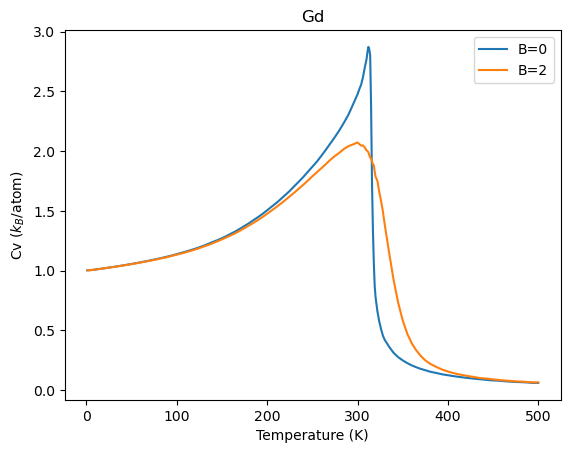

In [9]:
plt.plot(B0[:,0],C_B0,label='B=0')
plt.plot(B2[:,0],C_B2,label='B=2')
plt.legend()
plt.title('Gd')
plt.xlabel('Temperature (K)')
plt.ylabel('Cv ($k_B$/atom)')
plt.show()

**Looks much better :D !**

## Calculating $S_{mag}$

We are going to calculate the magnetic entropy from the relation:
    
$S_{mag}(T) = \int_0^T \frac{Cv(T)}{T}dT$

In order to facilitate the computation we can call the S_from_C function from the EntroPy module. Basic usage: `EntroPy.S_from_C(temperature,c)`


**Units** : S_from_C expects $C_V$ to be in $[k_B]$ units. It returns then the entropy in [J/mol/K]


___
## Exercise 1

* a) Use S_from_C to calculate the magnetic entropy from C_B0 and associate it S_B0;
* b) Repeat previous step but for the C_B2 and associate it to S_B2;

Proposed solution in the cheat sheet :)

In [10]:
#Please uncomment the following lines and execute them:
# plt.plot(B0[:,0],S_B0,label='H=0')
# plt.plot(B2[:,0],S_B2,label='H=2')
# plt.legend()
# plt.title('Gd')
# plt.xlabel('Temperature (K)')
# plt.ylabel('Cv ($k_B$/atom)')
# plt.show()

___

As you noticed, those entropies look weird, not only grow very fast near T=0, but the values themselves are high. This comes because in the MC simulations we described the spins as classic elements with classic statistics. Then on the limit $T \rightarrow 0$ instead of $C_V \rightarrow 0$ we have $C_V \rightarrow 1$ (from equipartition of the degrees of freedom).


All of this means that we cannot use directly those values of entropy. Luckly, we are interested in $\Delta S$:

$S(\Delta B,T) = S^{B_f}(T) - S^{B_i}(T)$ 

Since we do the same mistake twice, it cancels out :) So let's try to calculate it!

**Important:**  Make sure when computing $\Delta S$ that we have exactly the same temperatures in both ($B_0$ and $B_2$) data sets!

In [11]:
B0[:,0] == B2[:,0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

If this was not the case you should to interpolate each S array on the same Temperature range. Let's do it now, so to leave here an example.

In [12]:
# Find common limits
Tmax = min(max(B0[:,0]),max(B2[:,0]))
Tmin = max(min(B0[:,0]),min(B2[:,0]))

#Now we define the temperature points to consider e.g going from Tmin to Tmax with a step of 1K:
T=np.arange(Tmin,Tmax)

#Now we can use np.interp to linearly interpolate in the new T range. Please uncomment after completing Exercise 1
# S_B0 = np.interp(T,B0[:,0],S_B0)
# S_B2 = np.interp(T,B2[:,0],S_B2)

Now is safe to compute $\Delta S_{mag}$

In [13]:
# Uncomment this after completing Exercise 1
# plt.plot(T,S_B2-S_B0,label='$\Delta$ B=2')
# plt.legend()
# plt.title('Gd')
# plt.xlabel('Temperature (K)')
# plt.ylabel('$\Delta S_{mag}$  (J/K/mol)')
# plt.show()

By comparison, here it is the entropy with the raw heat capacity from UppASD:

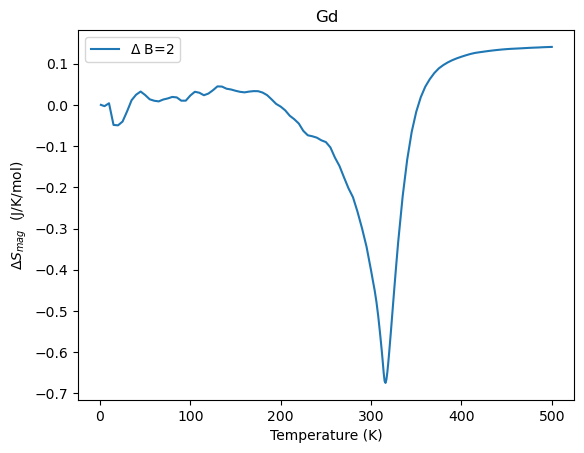

In [14]:
plt.plot(B0[:,0],EntroPy.S_from_C(B2[:,0],B2[:,6])-EntroPy.S_from_C(B0[:,0],B0[:,6]),label='$\Delta$ B=2')
plt.legend()
plt.title('Gd')
plt.xlabel('Temperature (K)')
plt.ylabel('$\Delta S_{mag}$  (J/K/mol)')
plt.show()

## Cheat list

Exercise 1

```
S_B0=EntroPy.S_from_C(B0[:,0],C_B0)
S_B2=EntroPy.S_from_C(B2[:,0],C_B2)
```